# Learning ipyrad output files

**20170517**

I want to get the hang of navigating and plotting things from the output files in ipyrad.



In [154]:
%load_ext rpy2.ipython

In [4]:
cd /mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUN1_py

/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUN1_py


First, I can get the summary stats and paths to all the output files using the ``-r`` flag:

In [5]:
!ipyrad -p params-cragig002.txt -r


Summary stats of Assembly cragig002
------------------------------------------------
         state  reads_raw  reads_passed_filter  clusters_total  \
FG001        6    4496623              4496623           28719   
FG009        6    5828500              5828500           31799   
FG100_B      6    4191123              4191123           27072   
FG102_B      6    3757306              3757306           32437   
FG205        6    4762949              4762949           28809   
FG212        6    4163068              4163068            1568   
Q314         6    3797205              3797205           32843   
Q324         6    4203350              4203350           47166   
Q330         6    3683576              3683576           63309   
Q339         6    6057345              6057345          142327   

         clusters_hidepth  hetero_est  error_est  reads_consens  
FG001               18878    0.021602   0.002395          16813  
FG009               19670    0.021421   0.002188       

### Step 3

Clustering is one of the most important and sensitive steps. So it's worth understanding what's in the s3_cluster_stats.txt files. I talked to Katherine on the phone to help make sense of the headers, because the documentation is not extremely thorough (the cost of the writers making everything sleek and simple!). So, here's the file:

![img](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Notebooks/images_for_notebooks/ex_cluster_stats_file.png?raw=true)

I wrote a script that produces scatter plots comparing different output stats. Script lives [here](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Scripts/data_exploration/ipyrad_clust_stats_plots.py). It allows optional flags so you can specify which plots you want made. 

Example usage:

In [9]:
cd /mnt/hgfs/SHARED_FOLDER/Git_repo/CRAGIG_run1/Scripts/data_exploration

/mnt/hgfs/SHARED_FOLDER/Git_repo/CRAGIG_run1/Scripts/data_exploration


In [11]:
!python ipyrad_clust_stats_plots.py -h

usage: ipyrad_clust_stats_plots.py [-h] -a ASSEMBLY -i INFILE [-o OUTDIR] [-x]
                                   [-y] [-z]

Produces plots from ipyrad cluster stats output file

optional arguments:
  -h, --help            show this help message and exit
  -a ASSEMBLY, --assembly ASSEMBLY
                        Assembly name
  -i INFILE, --infile INFILE
                        Path to cluster stats output file from ipyrad
  -o OUTDIR, --outdir OUTDIR
                        Path to directory for output files
  -x                    Make scatter plot showing total number of clusters vs
                        number of clusters filtered for depth
  -y                    Make plot showing average depth with majority rule vs
                        number of clusters filtered for depth
  -z                    Make plot showing standard deviation of read depth
                        with majority rule vs number of clusters filtered for
                        depth


Plots look like this:

![img](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Notebooks/images_for_notebooks/avg_rd_mj_v_filt_clusts_20170517.png?raw=true)
![img](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Notebooks/images_for_notebooks/sd_rd_mj_v_filt_clusts_20170517.png?raw=true)
![img](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Notebooks/images_for_notebooks/tot_clusts_v_filt_clusts_20170517.png?raw=true)

**20170522**

I thought I was going to have to build a Genepop file from the alleles.loci file, so that's what the next block of work was on! But it turns out PGD spider can convert a VCF to a Genepop. Hooray.



In [15]:
cd /mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUN1_py

/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUN1_py


In [17]:
test_alleles = open("cragig001_outfiles/cragig001.test.alleles", "r")
test_lines = test_alleles.readlines()
test_alleles.close()

Get number of characters leading to sequence, will need for getting SNP positions out of // lines

In [24]:
test_line_list = test_lines[0].strip().split()

In [27]:
print test_line_list[0]
print test_line_list[1]

FG001_0
TCTCCCTGACATCAGGGGGTTTCCTTAGGCAGCTCGAAGGTCCACCTAAAACCAAATTAAACCAACTTTTCCTGGTAGATAATTTGTCGAGGCTAATTTCCTCAGGTGTAATAATTGGTTAGGAGTAACGCTATGA


In [23]:
len_line = len(test_lines[0].strip())
print len_line

150


In [25]:
len_sample = len(test_line_list[0])
print len_sample

7


In [28]:
len_seq = len(test_line_list[1])
print len_seq

136


In [30]:
num_spaces = len_line - len_sample - len_seq
print num_spaces

7


In [35]:
start_ind_zb = len_sample + num_spaces
print start_ind_zb

14


In [36]:
# test starting index is right
print test_lines[0][14:17] # should be TCT

TCT


In [37]:
def find(s, ch):
    return [i for i, ltr in enumerate(s) if ltr == ch]

In [50]:
# get number of loci and sorted SNP positions
count = 0
positions = {}
for line in test_lines:
    if line[0:2] == "//":
        count += 1
        snp_pos_list = []
        indeces_hash = find(line,'-')
        indeces_hash[:] = [x - start_ind_zb for x in indeces_hash]
        indeces_ast = find(line, '*')
        indeces_ast[:] = [x - start_ind_zb for x in indeces_ast]
        snp_pos_list = indeces_hash + indeces_ast
        snp_pos_list.sort()
        tagname = int(line.strip().split()[-1].replace("|", "").replace("-", "").replace("*", ""))
        positions[tagname] = snp_pos_list

In [49]:
print positions[2]

[3, 12, 16, 18, 27, 34, 36, 38, 47, 84, 119]


In [51]:
num_tags = len(positions.keys())
print num_tags

8


In [56]:
test_alleles = open("cragig001_outfiles/cragig001.test.alleles", "r")
test_alleles_string = test_alleles.read()
loci_blocks = test_alleles_string.strip().split("//*|")
print loci_blocks
    
    
test_alleles.close()

['FG001_0       TCTCCCTGACATCAGGGGGTTTCCTTAGGCAGCTCGAAGGTCCACCTAAAACCAAATTAAACCAACTTTTCCTGGTAGATAATTTGTCGAGGCTAATTTCCTCAGGTGTAATAATTGGTTAGGAGTAACGCTATGA\nFG001_1       TCTCCCTGACATCAGGGGGTTTCCTTAGGCAGCTCGAAGGTCCACCTAAAACCAAATTAAACCAACTTTTCCTGGTAGATAATTTGTCGAGGCTAATTTCCTCAGGTGTAATAATTGGTTAGGAGTAACGCTATGA\nFG009_0       TCTCCCTGACATTAGGGGGTTTCCTTAGGCAGCTCGAAGGTCCACCTAAAACCAAATTAAACCAACTTTTCCTGGTAGATAATTTGTCGAGGCTAATTTCCTCAGGTG---TAATTGGTTAGGAGTAACGCTATGA\nFG009_1       TCTCCCTGACATTAGGGGGTTTCCTTAGGCAGCTCGAAGGTCCACCTAAAACCAAATTAAACCAACTTTTCCTGGTAGATAATTTGTCGAGGCTAATTTCCTCAGGTG---TAATTGGTGAGGAGTAACGCTATGA\nFG100_B_0     TCTCCCTGACATCAGGGGTTTTCCTTAGGCAGCTTGCAGGTCCACCTAAAACCAAATTAAACCAACTTTTCCTGGTAGATAATTTGTCGAGGCTAATTTCCTCAGGTG---TAATTGGTTAGGAGTAACGCTATGA\nFG100_B_1     TCTCCCTGACATCAGGGGGTTTCCTTAGGCAGCTCGAAGGTCCACCTAAAACCAAATTAAACCAACTTTTCCTGGTAGATAATTTGTCGAGGCTAATTTCCTCAGGTG---TAATTGGTTAGGAGTAACGCTATGA\nFG102_B_0     TCTCCCTGACATCAGGGGGTTTCCTTAGGCAGCTCGCAGGTCCACCTAAAACCAAATTAAACCAACTTTTCC

### Getting to Genepop file

**20170519**

Katherine said she uses PGDSpider to convert ipyrad.VCF to Genepop. Let's see if I can figure that out. Yikes - it keeps crapping out with an error that says ``ERROR 10:37:21 - input file error at line: 1342``, with a different line for each VCF file. Katherine mentioned that at some point ipyrad spit out weird VCF files. So until then, it might be worth trying to make a genepop from the alleles loci files that have both alleles for each RAD tag for each individual.

**201705522**

Katherine found the error. PGDSpider was glitching on the first locus line that had triallelic data. These loci made up a tiny minority of loci, and I'm now filtering them out with ``vcftools`` so I can rerun PGDSpider and see if it doesn't crash.

## PGDSPider Genepop

I finally figured out how to make a GP using PGD Spider according to Katherine's vcftools suggestion. However adegenet won't read it in. I want to double-check that it's not just that the loci names come each on a row instead of in one row separated by commas.

In [62]:
cd /mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/VCF_to_GP

/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/VCF_to_GP


In [63]:
gp = open("cragig001_biall_GP.txt")
gplines = gp.readlines()
gp.close()

In [72]:
snp_name_lines = []
genotype_lines = []
for line in gplines:
    if line[0:3] == "SNP":
        snp_name_lines.append(line)
    elif line != "\n" and line!= "Pop\n":
        genotype_lines.append(line)

In [73]:
snp_name_lines[0]

'SNP_1\n'

In [81]:
print len(snp_names_lines)

NameError: name 'snp_names_lines' is not defined

In [75]:
genotype_lines[0][0:19]

'FG001 ,  130130 130'

In [77]:
snp_comma_string = ""
for line in snp_name_lines: # get snp names and strip new lines
    snpname = line.strip()
    snp_comma_string += snpname + "," # add commas in between
snp_comma_string = snp_comma_string[:-1] # remove last comma

# make sure it worked
print snp_comma_string[0:30]
print snp_comma_string[-30:]


SNP_1,SNP_2,SNP_3,SNP_4,SNP_5,
,SNP_30879,SNP_30880,SNP_30881


In [80]:
output = open("with_comma_sep_names_GP_test.gen","w")
output.write("test with names on same row" + "\n")
output.write(snp_comma_string + "\n")
output.write("Pop" + "\n")
for line in genotype_lines:
    output.write(line)

## VCF tools to filter for only biallelic loci

In [132]:
cd /mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUN1_py

/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUN1_py


In [140]:
!vcftools --vcf cragig001_outfiles/cragig001.vcf --min-alleles 2 --max-alleles 2 --out cragig001_outfiles/cragig001_biall --recode


VCFtools - UNKNOWN
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf cragig001_outfiles/cragig001.vcf
	--max-alleles 2
	--min-alleles 2
	--out cragig001_outfiles/cragig001_biall
	--recode

After filtering, kept 10 out of 10 Individuals
Outputting VCF file...
After filtering, kept 30881 out of a possible 31802 Sites
Run Time = 0.00 seconds


In [138]:
# number loci before filtering 001
!awk '{print NF}' cragig001_outfiles/cragig001.str | sort -nu | head -n 1

31803


In [143]:
# number of loci after filtering 001 and transforming back to str with PGD Spider
!awk '{print NF}' cragig001_outfiles/cragig001_biall_spid.str | sort -nu | head -n 1

30881


In [145]:
!vcftools --vcf cragig002_outfiles/cragig002.vcf --min-alleles 2 --max-alleles 2 --out cragig002_outfiles/cragig002_biall --recode


VCFtools - UNKNOWN
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf cragig002_outfiles/cragig002.vcf
	--max-alleles 2
	--min-alleles 2
	--out cragig002_outfiles/cragig002_biall
	--recode

After filtering, kept 10 out of 10 Individuals
Outputting VCF file...
After filtering, kept 2740 out of a possible 2810 Sites
Run Time = 0.00 seconds


In [146]:
# number loci before filtering 002
!awk '{print NF}' cragig002_outfiles/cragig002.str | sort -nu | head -n 1

2811


In [148]:
# number of loci after filtering 002 and transforming back to str with PGD Spider
!awk '{print NF}' cragig002_outfiles/cragig002_biall_spid.str | sort -nu | head -n 1

2740


This one is so much lower! Just looked at the clustering stats file and FG212 produced very few loci. Katherine also suggested that it could be adapter contamination because I did not filter for that like I should have, although that doesn't quite explain why the intermediate clustering threshold is the one with the vastly lower number of loci. I will have to rerun the branching assembly >.< but I think for now I can trust the 001 and 003. 

In [149]:
!vcftools --vcf cragig003_outfiles/cragig003.vcf --min-alleles 2 --max-alleles 2 --out cragig003_outfiles/cragig003_biall --recode


VCFtools - UNKNOWN
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf cragig003_outfiles/cragig003.vcf
	--max-alleles 2
	--min-alleles 2
	--out cragig003_outfiles/cragig003_biall
	--recode

After filtering, kept 10 out of 10 Individuals
Outputting VCF file...
After filtering, kept 28922 out of a possible 29791 Sites
Run Time = 0.00 seconds


In [150]:
# number loci before filtering 003
!awk '{print NF}' cragig003_outfiles/cragig003.str | sort -nu | head -n 1

29792


In [151]:
# number of loci after filtering 003 and transforming back to str with PGD Spider
!awk '{print NF}' cragig003_outfiles/cragig003_biall_spid.str | sort -nu | head -n 1

28922


## PGDSpider VCF to Structure file

**20170524**

ipyrad spits out structure files, but they don't include the population designatio nor the loci names. Katherine said that I can use PGDSpider to convert my VCF to a Structure file that has both of these. Trying that now, using her .spid file.

Test it on one...

Katherine says you need to tell adegenet how many loci are in teh file and also how many individuals. She does that with this code:

For number of loci,

In [114]:
cd /mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/VCF_to_GP

/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/VCF_to_GP


In [85]:
!awk '{print NF}' cragig001_structure.str | sort -nu | head -n 1

2740


In [127]:
!awk '{print NF}' cragig002_structure.str | sort -nu | head -n 1

2740


In [116]:
!awk '{print NF}' cragig003_structure.str | sort -nu | head -n 1

28922


## Count loci in structure files

Confused about loci count using Katherine's awk code - why would there be such a discrepancy (2740 loci in cragig001 with 85% similarity, and 28922 loci in cragig003, with 80% similarity? should be fewer loci as similarity decreases). Gonna count using the header.

In [120]:
cd /mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/VCF_to_GP

/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/VCF_to_GP


In [118]:
ls

afterfilter_001.vcf*            cragig001_structure.str*
afterfilter_002.log*            cragig001.vcf*
afterfilter_002.recode.vcf*     cragig002_biall_GP.txt*
afterfilter_003.log*            cragig002.vcf*
afterfilter_003.recode.vcf*     cragig003_biall_GP.txt*
afterfilter_20170522.log*       cragig003_structure.str*
cragig001_asone_structure.str*  cragig003.vcf*
cragig001_biall_GP.txt*         with_comma_sep_names_GP_test.gen*


In [125]:
cragig001 = open("cragig001_asone_structure.str","r")
header001 = cragig001.readline()
cragig001.close()
snp_list_001 = header001.strip().split()
len(snp_list_001)

2740

In [126]:
cragig003 = open("cragig003_structure.str","r")
header003 = cragig003.readline()
cragig003.close()
snp_list_003 = header003.strip().split()
len(snp_list_003)

28922

Well! Looks like her code works fine, and also super confused about these results.

Alright. Adegenet was not happy with only one population, so I added a fake second population and ignored its statistics. Here's the plot for fis.

In [102]:
import matplotlib.pyplot as plt
import numpy as np

In [92]:
cd /mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUN1_py/cragig001_outfiles

/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUN1_py/cragig001_outfiles


In [98]:
fis_001 = open("fis_20170524.csv","r")
fis_001_lines = fis_001.readlines() # get lines from file
fis_001_lines = fis_001_lines[1:] # get rid of header
fis_001.close()

In [107]:
fis_001_vals = []
for line in fis_001_lines:
    linelist = line.strip().split(",")
    if linelist[1] != "NA":
        fis_001_vals.append(float(linelist[1]))  

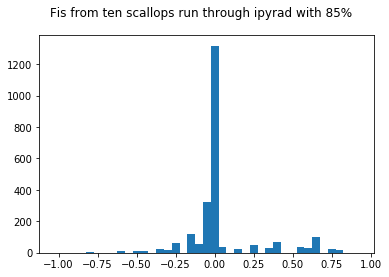

In [112]:
plt.hist(fis_001_vals, bins = np.arange(-1,1,.05)-.025)
plt.suptitle("Fis from ten scallops run through ipyrad with 85%")
plt.show()